This notebook will serve as a starting point to EMG visualisation.

We will use PCA to project the data down to 2 components and then visualise the embeddings three times, each time colorised with a different output variable.

We will do this with rectified and non rectified data.

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import emg.data as data
import emg.display as display
import sklearn.decomposition as decomposition

import model.model as model
import model.knowledgeBase as kb

In [7]:
devl_fn = '../data/subject1/dataset-20140630-1325-FM-1.pkl'
test_fn = '../data/subject1/dataset-20140630-1329-FM-2.pkl'

devl_emg, devl_pos = data.jjmdata_from_file(devl_fn)
test_emg, test_pos = data.jjmdata_from_file(test_fn)

IOError: [Errno 2] No such file or directory: '../data/subject1/dataset-20140630-1325-FM-1.pkl'

In [3]:
X, Z, VX, VZ, TX, TZ = data.train_valid_test(devl_emg, devl_pos, test_emg, test_pos, rot=False)

PCA on non-rectified data
---

In [22]:
m = decomposition.PCA(2)
E = m.fit_transform(X)

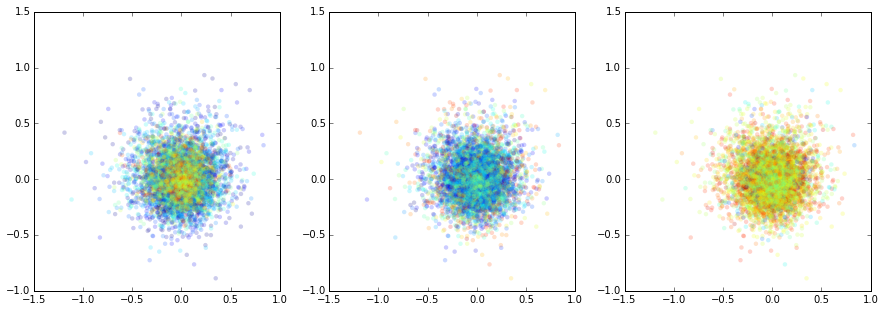

In [23]:
fig, axs = plt.subplots(1, 3, squeeze=False, figsize=(15, 5))
axs = axs[0]

display.embedding_2d(E, Z, axs, alpha=.2, lw=0)

PCA on rectified data
---

In [5]:
m = decomposition.PCA(2)
E = m.fit_transform(abs(X))

NameError: name 'X' is not defined

AttributeError: 'module' object has no attribute 'embedding_2d'

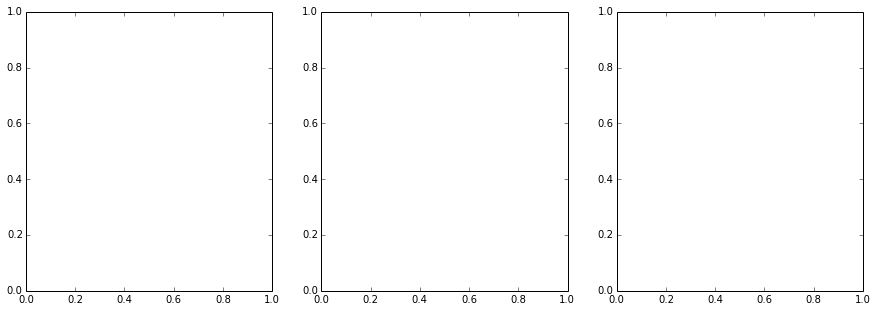

In [6]:
fig, axs = plt.subplots(1, 3, squeeze=False, figsize=(15, 5))
axs = axs[0]

display.embedding_2d(E, Z, axs, alpha=.2, lw=0)

In [7]:
e = kb.smallSportKb()
X_sport, labels = e.getDataByLabels(['hantel', 'reverse_kettle'])

m = decomposition.PCA(2)
E = m.fit_transform(X_sport)

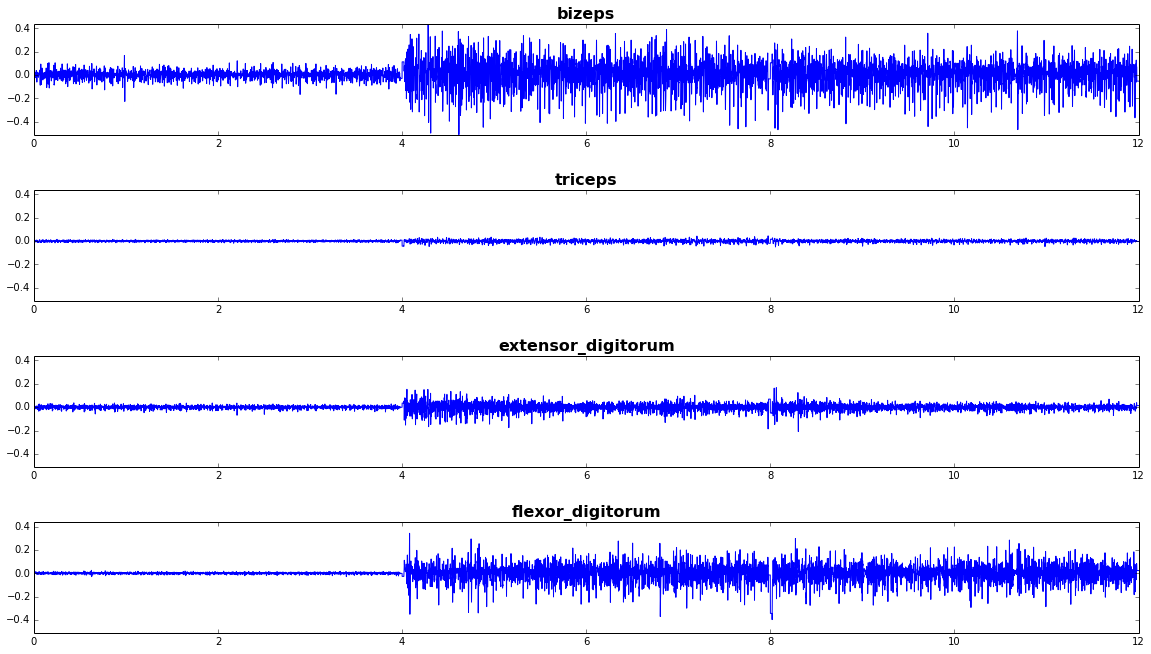

In [9]:
display.visualizeEmg(e,0,12)

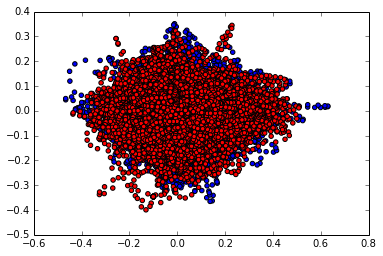

In [66]:
plt.scatter(E[labels == 'hantel',0], E[labels == 'hantel',1], c = 'b')
plt.scatter(E[labels == 'reverse_kettle',0], E[labels == 'reverse_kettle', 1], c = 'r')
plt.show()